#### 1. Importing Libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users

In [7]:
df_airbnb = pd.read_csv(os.path.join(path, '2 - Airbnb - Data', 'Prepared Data', 'df_airbnb_v2_rev.csv'))

In [8]:
df_airbnb.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'name', 'host_id', 'host_name',
       'area', 'district', 'latitude', 'longitude', 'room_type', 'price',
       'min_nights', 'nr_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price category'],
      dtype='object')

#### 2. Data Cleaning

In [9]:
# Dropping unnamed column
df_airbnb1 = df_airbnb.drop(columns = ['Unnamed: 0','Unnamed: 0.1'])

In [11]:
df_airbnb1.head(20)

,id,name,host_id,host_name,area,district,latitude,longitude,room_type,price,min_nights,nr_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price category
0,1944,bright & airy Pberg/Mitte 3 months or more,2164,Lulah,Mitte,Brunnenstr. Nord,52.54425,13.39749,Private room,20,60,18,2018-11-11,0.20,3,251,low price
1,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53454,13.40256,Entire home/apt,59,5,135,2021-02-12,2.24,6,173,middle price
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53500,13.41758,Entire home/apt,90,62,147,2021-01-01,1.03,1,348,middle price
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49885,13.34906,Private room,29,7,27,2019-05-31,0.29,1,364,low price
4,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51171,13.45477,Entire home/apt,79,7,135,2021-01-23,1.00,1,0,middle price
5,7071,BrightRoom with sunny greenview!,17391,BrightRoom,Pankow,Helmholtzplatz,52.54316,13.41509,Private room,33,1,293,2020-03-31,2.08,1,0,low price
6,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53303,13.41605,Entire home/apt,180,6,8,2020-01-04,0.12,1,43,high price
7,14325,Apartment in Prenzlauer Berg,55531,Chris + Oliver,Pankow,Prenzlauer Berg Nordwest,52.54785,13.40556,Entire home/apt,70,90,25,2020-05-02,0.19,3,255,middle price
8,16644,In the Heart of Berlin - Kreuzberg,64696,Rene,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.50479,13.43510,Entire home/apt,90,60,48,2017-12-14,0.37,2,194,middle price
9,17904,Beautiful Kreuzberg studio/fast WiFi,68997,Matthias,Friedrichshain-Kreuzberg,südliche Luisenstadt,52.49578,13.42194,Entire home/apt,49,5,279,2021-01-16,2.07,1,339,middle price


In [12]:
df_airbnb1.shape

(19761, 17)

In [14]:
# Check for missing values

df_airbnb1.isnull().sum()

# No missing values to handle

id                                   0
name                                32
host_id                              0
host_name                          929
area                                 0
district                             0
latitude                             0
longitude                            0
room_type                            0
price                                0
min_nights                           0
nr_reviews                           0
last_review                       4049
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
price category                       0
dtype: int64

##### dropping 'name', 'host_name' and 'last review' as they contain qualitative data not relevant for the exercise purpose

In [15]:
# Dropping unnamed column
df_airbnb2 = df_airbnb1.drop(columns = ['name','host_name', 'last_review'])

In [16]:
# double checking results
df_airbnb2.isnull().sum()


id                                0
host_id                           0
area                              0
district                          0
latitude                          0
longitude                         0
room_type                         0
price                             0
min_nights                        0
nr_reviews                        0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price category                    0
dtype: int64

In [17]:
dups = df_airbnb.duplicated()

In [19]:
dups.shape

(19761,)

###### no duplicates

C:\Users\laune\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

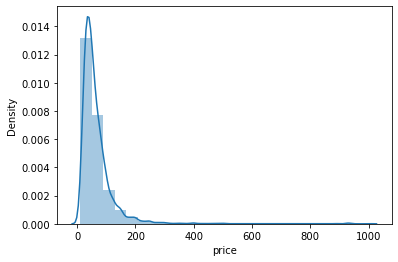

In [20]:
sns.distplot(df_airbnb2['price'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [21]:
# Check the mean
df_airbnb2['price'].mean() 

67.03142553514498

In [22]:
# Check the median
df_airbnb2['price'].median()

50.0

In [23]:
# Check the max
df_airbnb2['price'].max() 

999

#### 3. Data preparation for regression

##### Is there a strong correlation between minimum nights per stay and price per night?


##### Does higher minimum night’s stay imply a lower price per night?

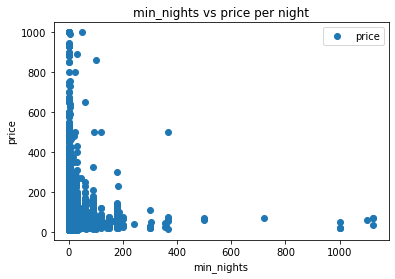

In [24]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_airbnb2.plot(x = 'min_nights', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('min_nights vs price per night')  
plt.xlabel('min_nights')  
plt.ylabel('price')  
plt.show()

In [25]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_airbnb2['min_nights'].values.reshape(-1,1)
y = df_airbnb2['price'].values.reshape(-1,1)

In [26]:
X

array([[60],
       [ 5],
       [62],
       ...,
       [ 2],
       [ 7],
       [ 2]], dtype=int64)

In [27]:
y

array([[20],
       [59],
       [90],
       ...,
       [80],
       [25],
       [22]], dtype=int64)

In [28]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### 4. Regression Analysis

In [29]:
# Create a regression object.

regression = LinearRegression()

In [30]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [31]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

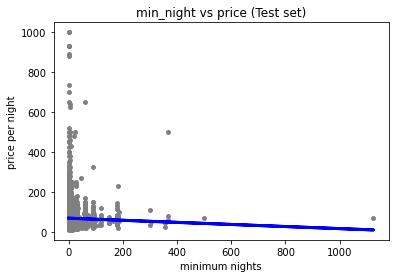

In [32]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='blue', linewidth =3)
plot_test.title('min_night vs price (Test set)')
plot_test.xlabel('minimum nights')
plot_test.ylabel('price per night')
plot_test.show()

In [33]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [34]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.05224962]]
Mean squared error:  3884.360154579628
R2 score:  -0.0008992712181601359


In [35]:
y_predicted

array([[67.61689291],
       [67.56464329],
       [67.51239367],
       ...,
       [67.56464329],
       [67.51239367],
       [67.61689291]])

In [36]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,14,67.616893
1,30,67.564643
2,79,67.512394
3,65,67.407894
4,36,67.564643
5,45,67.407894
6,90,67.564643
7,85,67.564643
8,22,67.564643
9,33,67.616893


##### Compare how the regression fits the training set

In [37]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [38]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [39]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.05224962]]
Mean squared error:  4744.545901355485
R2 score:  0.0006041061680664983


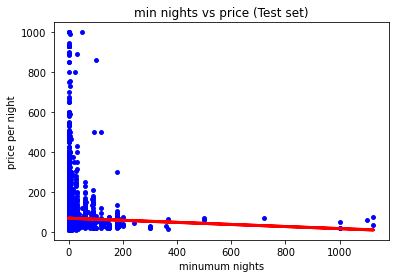

In [40]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='blue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('min nights vs price (Test set)')
plot_test.xlabel('minumum nights')
plot_test.ylabel('price per night')
plot_test.show()

### Bonus: performance improvement after removing outliers

##### considering a cap of miminum nights of 365 days (one year)

In [42]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df_airbnb2[df_airbnb2['min_nights'] <=365] 

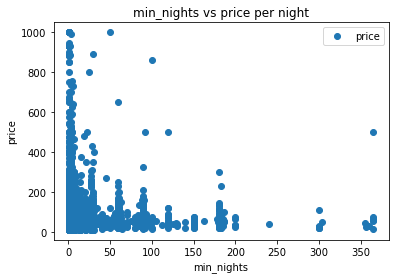

In [43]:
df_test.plot(x = 'min_nights', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('min_nights vs price per night')  
plt.xlabel('min_nights')  
plt.ylabel('price')  
plt.show()

In [44]:
# Reshape again.

X_2 = df_test['min_nights'].values.reshape(-1,1)
y_2 = df_test['price'].values.reshape(-1,1)

In [45]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [46]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [47]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [48]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [49]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.0602474]]
Mean squared error:  4944.0678974012135
R2 score:  -0.0003205171535944906


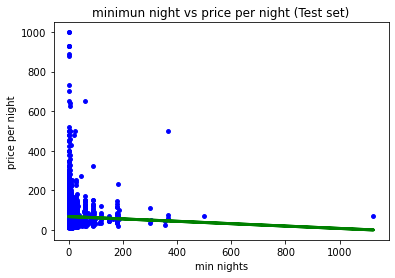

In [50]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_train, regression.predict(X_train), color='green', linewidth =3)
plot_test.title('minimun night vs price per night (Test set)')
plot_test.xlabel('min nights')
plot_test.ylabel('price per night')
plot_test.show()

##### there is a poor fit between minimum night´s stay and price per night. Apparently other elements than the minimum night do have a better fit or correlation with the price